In [5]:
pip install --upgrade tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.14.0-py2.py3-none-any.whl (173 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-win_amd64.whl size=33700 sha256=e714d931e16adbaa8a646a

ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 1.7.1 which is incompatible.


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.4.1'

In [2]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [4]:

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [5]:

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)


Epoch 1/25
250/250 [==============================] - 123s 488ms/step - loss: 0.7014 - accuracy: 0.5214 - val_loss: 0.6762 - val_accuracy: 0.5395
Epoch 2/25
250/250 [==============================] - 55s 221ms/step - loss: 0.6570 - accuracy: 0.6039 - val_loss: 0.6184 - val_accuracy: 0.6620
Epoch 3/25
250/250 [==============================] - 55s 221ms/step - loss: 0.6119 - accuracy: 0.6535 - val_loss: 0.5505 - val_accuracy: 0.7345
Epoch 4/25
250/250 [==============================] - 55s 220ms/step - loss: 0.5393 - accuracy: 0.7282 - val_loss: 0.5272 - val_accuracy: 0.7375
Epoch 5/25
250/250 [==============================] - 55s 221ms/step - loss: 0.5083 - accuracy: 0.7458 - val_loss: 0.5038 - val_accuracy: 0.7515
Epoch 6/25
250/250 [==============================] - 55s 220ms/step - loss: 0.4874 - accuracy: 0.7647 - val_loss: 0.5026 - val_accuracy: 0.7500
Epoch 7/25
250/250 [==============================] - 55s 220ms/step - loss: 0.4675 - accuracy: 0.7766 - val_loss: 0.4863 - val_a

In [6]:
# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


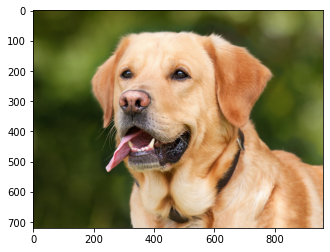

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
test = mpimg.imread("./dataset/single_prediction/cat_or_dog_1.jpg")
plt.imshow(test)